# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**Penjelasan mengenai Proyek Machine Learning Tahap Clustering :**

Pada proyek kali ini saya menggunakan dataset yang direkomendasikan oleh dicoding yaitu Bank Transaction Dataset for Fraud Detection. Pada dataset ini memiliki 2512 baris, dan 16 kolom. Pada kolom terdapat :
  *   Kolom Kategorikal : TransactionID, AccountID, TransactionType, Location, DeviceID, IP Address, MerchantID, Chanel, PreviousTransactionDate dan CustomerOccupation
  *   Kolom Numerik : TransactionAmount, AccountBalance, TransactionDuration,LoginAttempts, CustomerAge




# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [111]:
import pandas as pd  # untuk manipulasi dan analisis data
import numpy as np # untuk melakukan perhitungan numerik
import matplotlib.pyplot as plt  # untuk visualisasi grafik
import seaborn as sns # untuk visualisasi data

from sklearn.preprocessing import MinMaxScaler # mengimpor MinMax Scaler untuk normalisasi
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler untuk normalisasi data
from sklearn.preprocessing import LabelEncoder # untuk mengcoder data kategorikal
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans # Mengimpor algoritma KMeans untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.decomposition import PCA # Mengimpor PCA untuk reduksi dimensi

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [112]:
#Membaca dataset dan menampilkannya
df = pd.read_csv('https://raw.githubusercontent.com/riffabella/Submission-Project-Machine-Learning-Pemula/refs/heads/main/Dataset_inisiasi.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Memahami Struktur Data**

In [113]:
df.shape

(2512, 16)

In [114]:
# Menampilkan 5 baris pertama dataset
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [115]:
# Menampilkan jumlah baris dan kolom dalam dataset serta jenis data di setiap kolom (numerikal atau kategorikal).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [116]:
# Menampilkan parameter statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**Berdasarkan Deksriptif Statistik :**

Jumlah data setiap kolom terdiri dari 2512 data dengan pada kolom:
*   TransactionAmount : memiliki data unik dengan nilai rata-rata transaksi yang dilakukan yaitu 297 transaksi.  
*   CustomerAge : Usia pengguna yang melakukan transaksi dimulai dari usia 18 Tahun hingga 80 Tahun. Dengan rata usia pengguna yang melakukan transaksi dari 27 Tahun hingga 59 Tahun
*   TransactionDuration : Durasi transaksi yang dilakukan pengguna mencapai rata-rata 119.64 dengan minimal durasi 10 hingga maksimal durasi 300
*   LoginAttempts : Rata-rata pengguna melakukan login adalah 1.124, dengan minimal 1 kali dan maksimal 5 kali percobaan login
*   AccountBalance : Rata-rata saldo pengguna adalah 5.114, dengan minimal saldo 101 dan maximal saldo sebesar 14.977







## **Menangani Duplikasi Data**

In [117]:
print(df.duplicated().sum())

0


**Insight**:
Tidak ada data yang duplikat

## **Menangani Data yang Hilang**

In [118]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


**Insight**:
Tidak ada missing value untuk setiap kolom

## **Menghapus Fitur**

In [119]:
# Menghapus fitur/kolom  'TransactionID', 'AccountId', 'Location', 'DeviceID', 'MerchantID', 'IP Adress', 'TransactionDate' dan 'PreviousTransactionDate'
columns_to_drop = ['TransactionID', 'AccountID', 'Location', 'DeviceID', 'MerchantID', 'IP Address', 'TransactionDate', 'PreviousTransactionDate']
df.drop(columns=columns_to_drop, inplace=True)

In [120]:
# Menampilkan kembali informasi data 5 terbesar setelah dilakukan drop data
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Online,19,Student,56,1,1122.35
3,184.50,Debit,Online,26,Student,25,1,8569.06
4,13.45,Credit,Online,26,Student,198,1,7429.40


## **Analisis Distribusi dan Korelasi**

In [121]:
# Menampilkan statistik deskriptif dari dataset
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


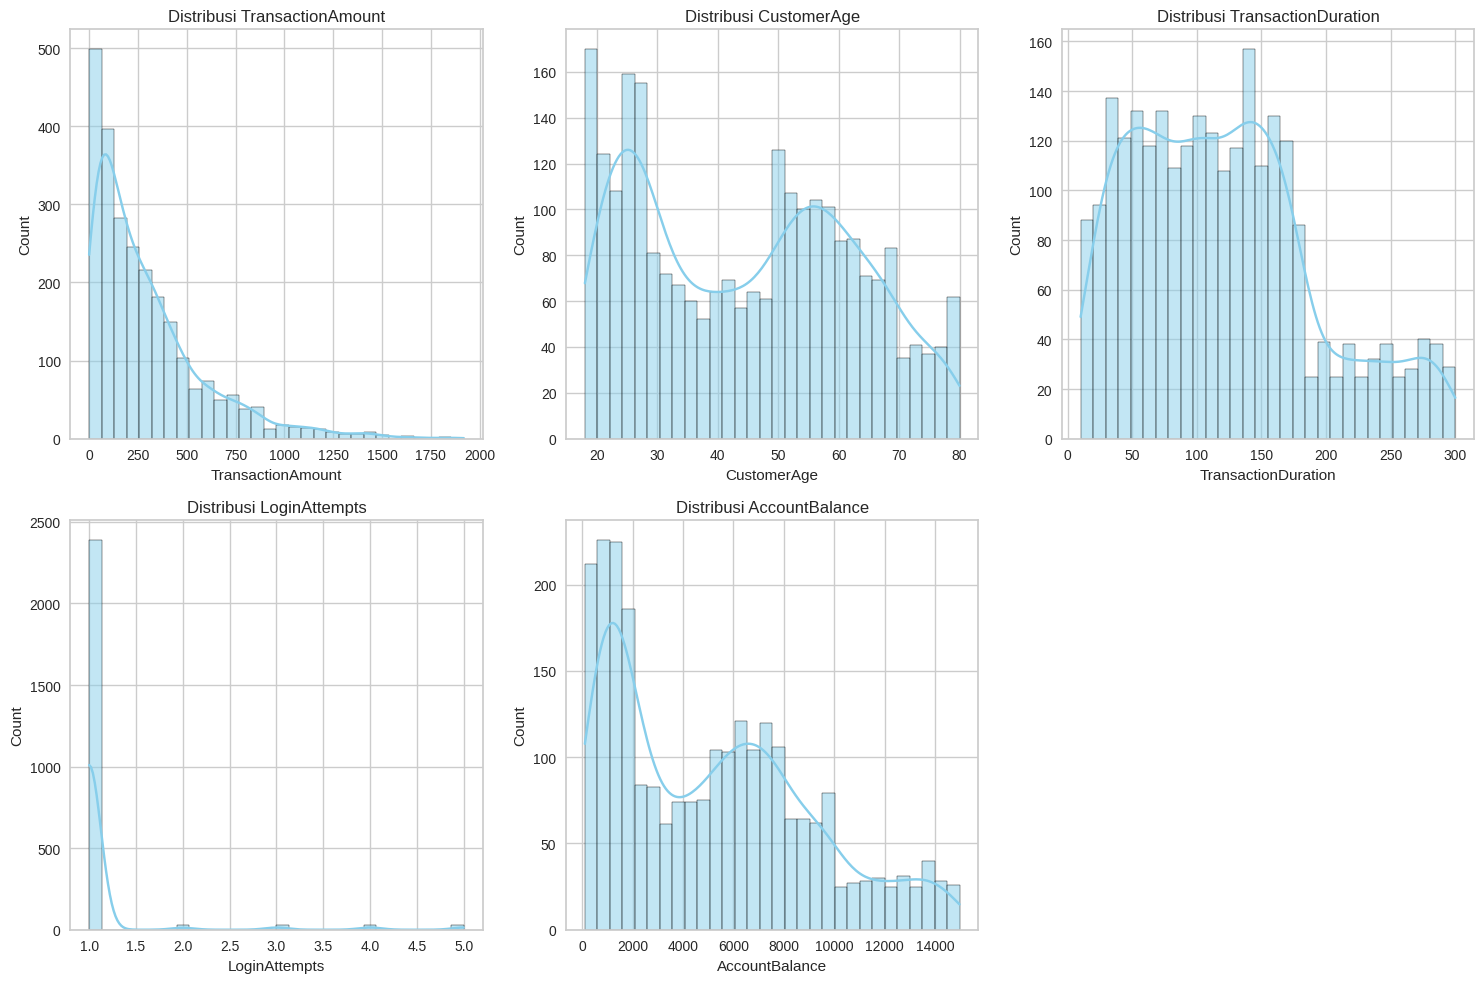

In [122]:
# Statistik deskriptif untuk variabel numerik
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
desc_stats = df[numeric_cols].describe()

# Visualisasi distribusi variabel numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

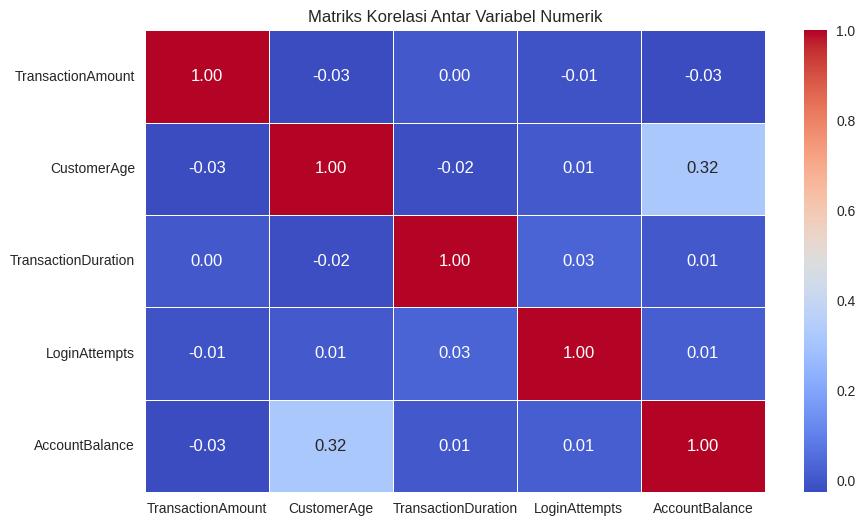

In [123]:
# Visualisasi korelasi antar variabel numerik dengan matriks korelasi
plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

**Insight:**
- Berdasarkan heatmap Matriks korelasi ini, terlihat bahwa tidak ada hubungan yang signifikan antara kolom numerikal (TransactionAmount, TransactionDuration, LoginAttempts, dan AccountBalance) karena nilai korelasinya mendekati nol. Namun, terdapat korelasi positif sedang (0.32) antara CustomerAge dan AccountBalance, yang menunjukkan bahwa semakin tua seorang pelanggan, cenderung semakin besar saldo akunnya. Hal ini bisa mengindikasikan bahwa pelanggan yang lebih senior memiliki kebiasaan menabung lebih besar dibandingkan pelanggan yang lebih muda. Korelasi rendah antara variabel lain menunjukkan bahwa faktor-faktor ini mungkin dipengaruhi oleh aspek lain yang tidak dicakup dalam dataset ini.

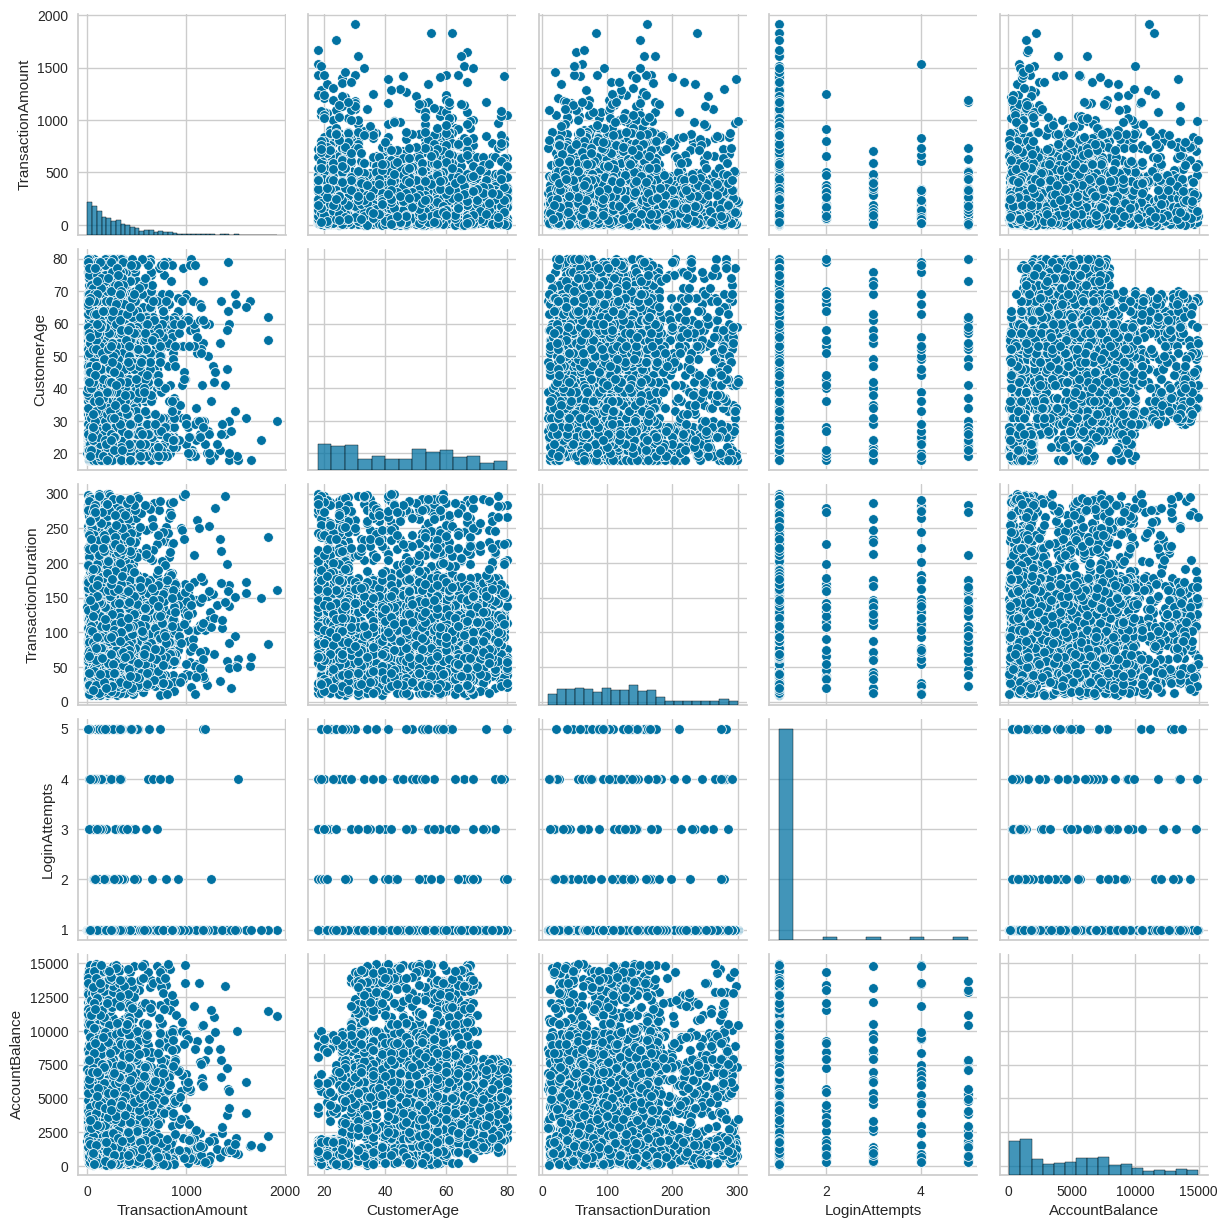

In [124]:
# Scatter plot untuk melihat hubungan antar variabel
sns.pairplot(df[numeric_cols])
plt.show()

## **Visualisasi Data**

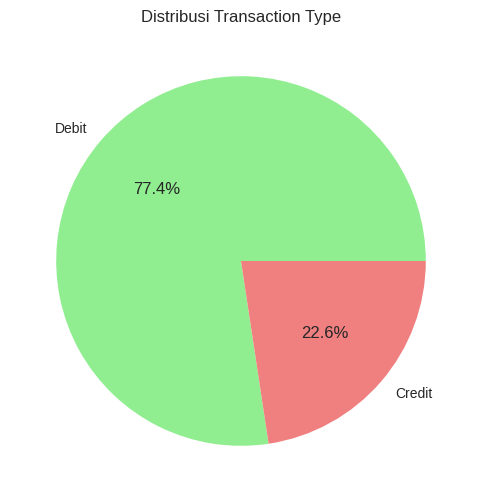

In [125]:
# Pie Chart - Distribusi Channel
plt.figure(figsize=(6, 6))
df['TransactionType'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','lightcoral'])
plt.title('Distribusi Transaction Type')
plt.ylabel('')  # Menghilangkan label default
plt.show()

**Insight**: Transakski debit lebih banyak digunakan dibanding credit

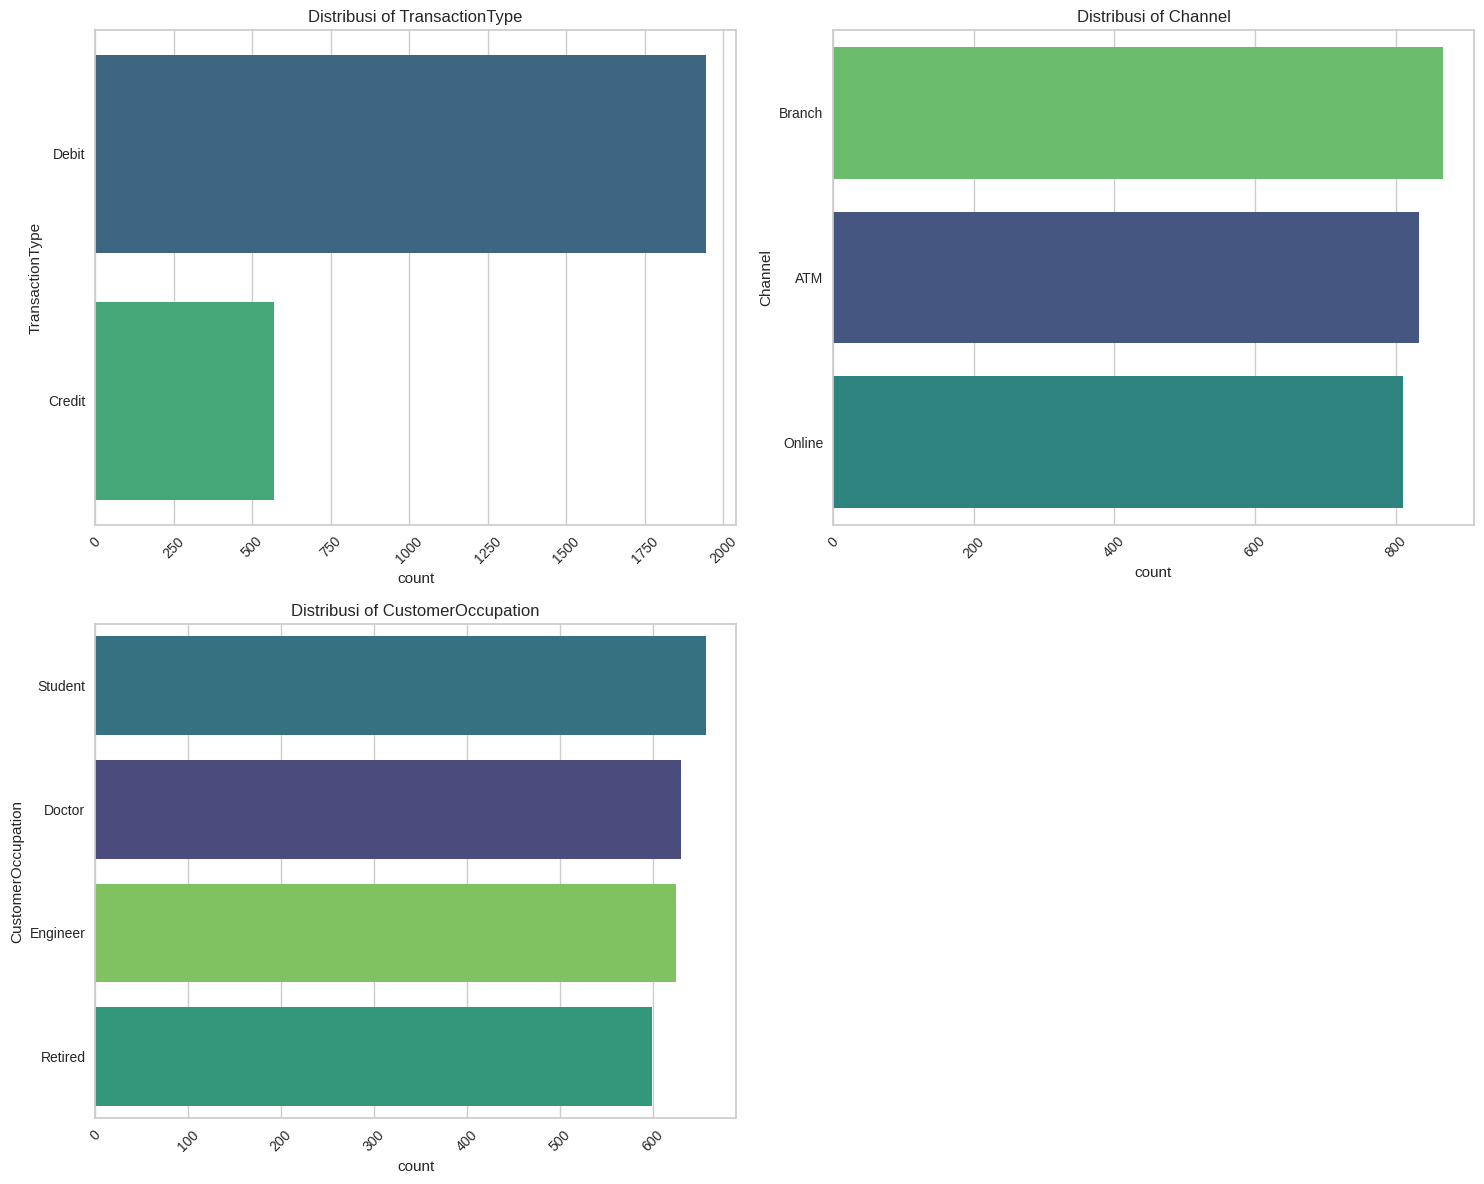

In [126]:
# Visualisasi distribusi untuk variabel kategorikal
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=col, hue=col, palette="viridis", order=df[col].value_counts().index, legend=False)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi of {col}')

plt.tight_layout()
plt.show()

## **Melihat outlier dengan boxplot**

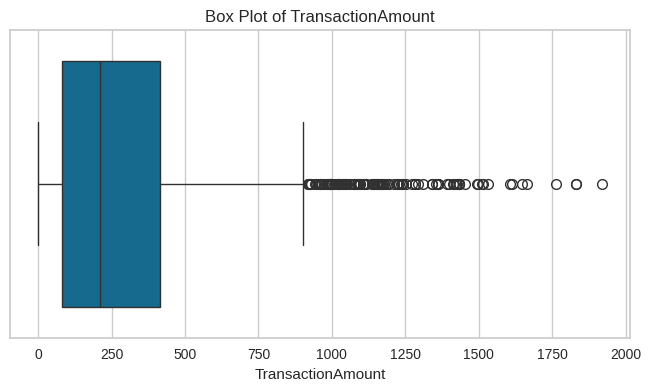

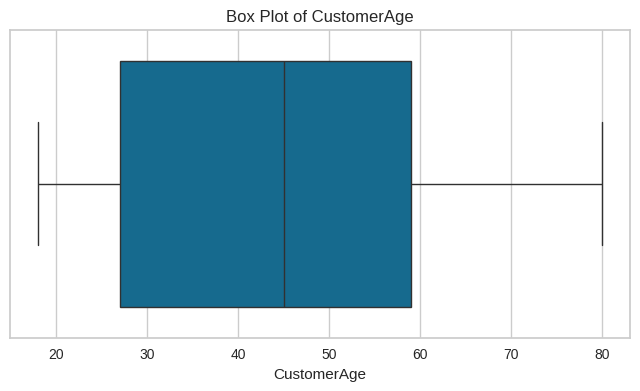

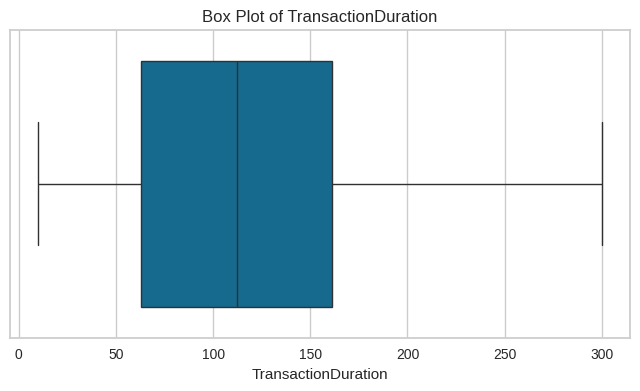

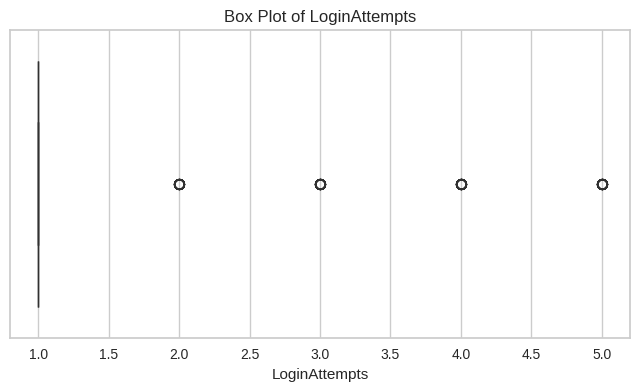

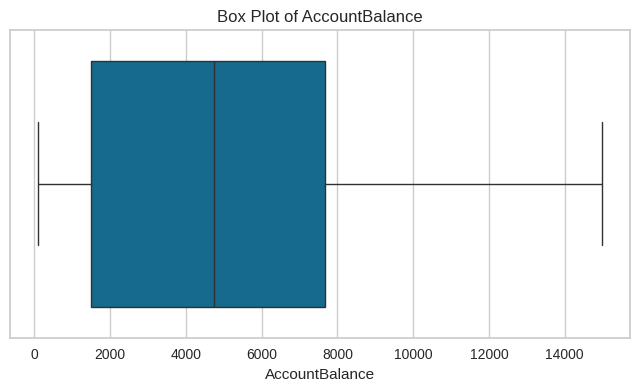

In [127]:
# mendeteksi/melihat outlier dengan boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

**Insight**:

Terlihat terdapat dua outlier yaitu pada kolom TransactionAmount dan LoginAttempts, yang akan di proses pada tahap data preprocessing
****

**Insight yang dari EDA:**
*   Transaksi melalui kantor cabang (branch) lebih banyak dibandingkan dengan online dan ATM sehingga dapat menunjukkan banyak pelanggan masih menggunakan transaksi langsung di cabang bank
*   Pelanggan berasal dari beberapa latar belakang dengan proporsi yang cukup seimbang, menunjukkan segmen pelanggan yang seimbang.






# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Channel              2512 non-null   object 
 3   CustomerAge          2512 non-null   int64  
 4   CustomerOccupation   2512 non-null   object 
 5   TransactionDuration  2512 non-null   int64  
 6   LoginAttempts        2512 non-null   int64  
 7   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 157.1+ KB


## **Menghapus atau Menangani Data Kosong**

In [129]:
# Memeriksa apakah ada data kosong
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


## **Menghapus Data Duplikat**

In [130]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


## **Deteksi dan Penanganan Outlier**

In [131]:
# Menghitung batas IQR untuk deteksi outlier
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier
outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))

# Menghitung jumlah outlier per fitur
outlier_counts = outliers.sum()
outlier_counts

,0
TransactionAmount,113
CustomerAge,0
TransactionDuration,0
LoginAttempts,122
AccountBalance,0


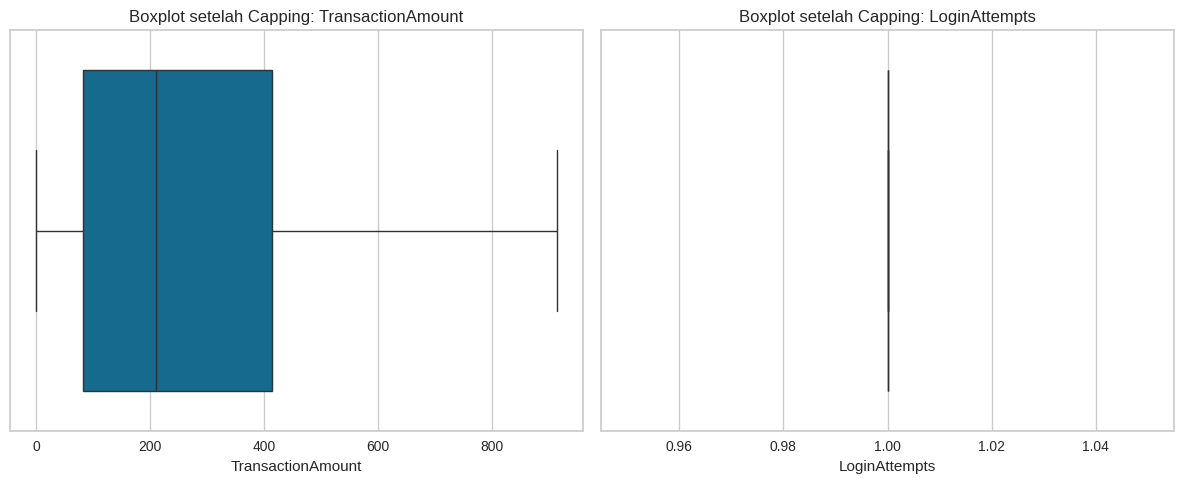

In [132]:
# Menangani outlier dengan capping (winsorization)
df_cleaned = df.copy()
for col in ["TransactionAmount", "LoginAttempts"]:
    df_cleaned[col] = np.clip(df_cleaned[col], lower_bound[col], upper_bound[col])

# Verifikasi distribusi setelah penanganan outlier
plt.figure(figsize=(12, 5))
for i, col in enumerate(["TransactionAmount", "LoginAttempts"], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot setelah Capping: {col}')

plt.tight_layout()
plt.show()

In [133]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Online,19,Student,56,1,1122.35
3,184.50,Debit,Online,26,Student,25,1,8569.06
4,13.45,Credit,Online,26,Student,198,1,7429.40


## **Normalisasi atau Standarisasi**

In [134]:
# melakukan normalisasi dengan MinMaxScaler untuk mengubah data ke dalam rentang [0, 1]
numeric_cols = df.select_dtypes(include=['number'])
scaler = MinMaxScaler()
df[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

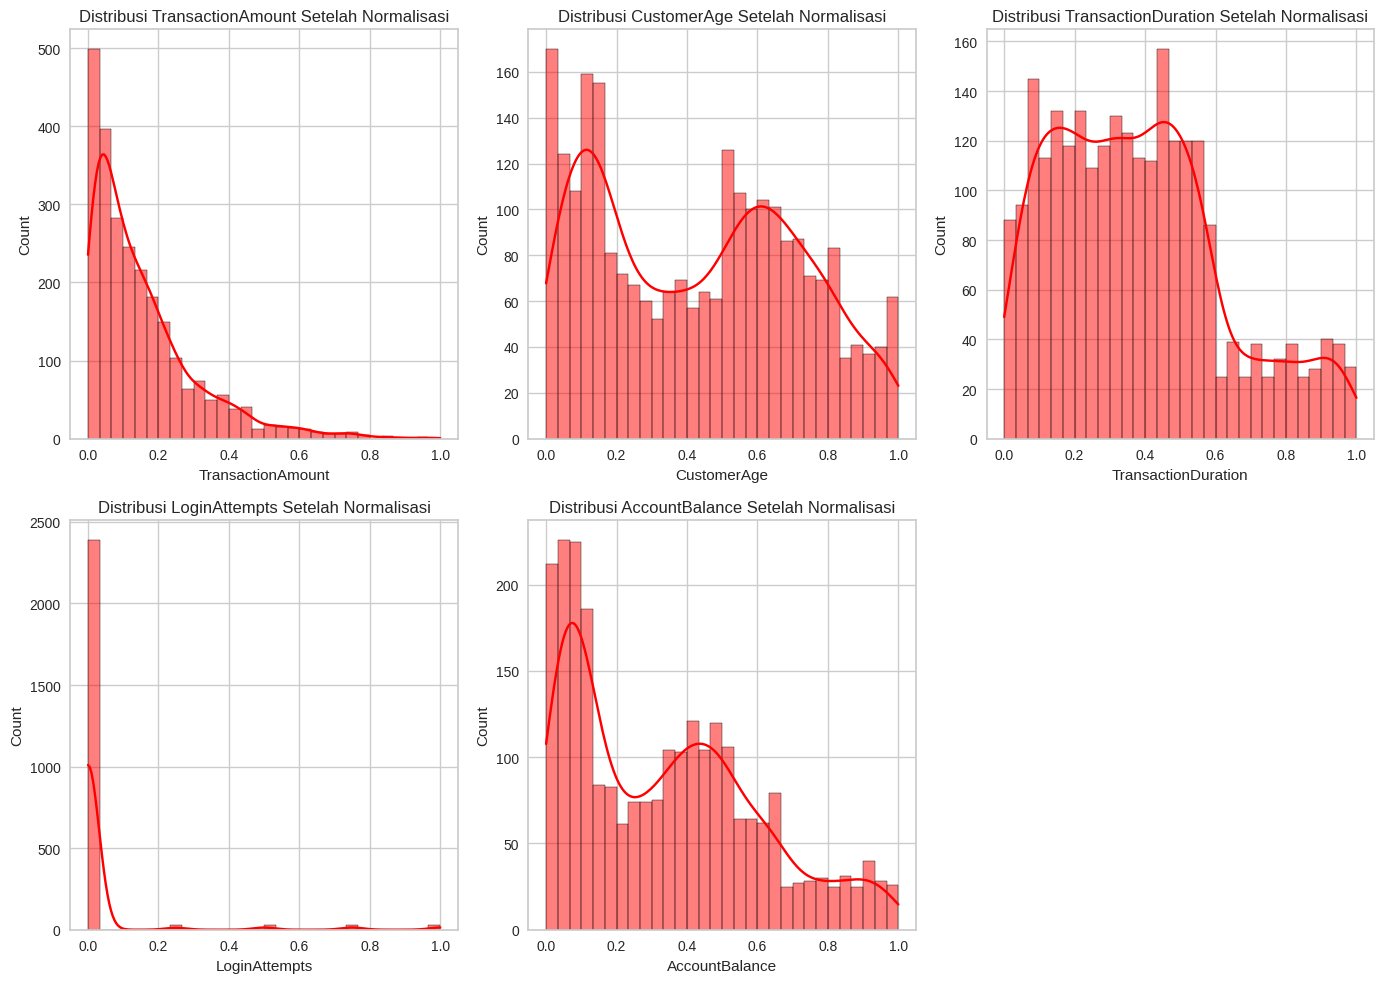

In [135]:
# Plot histogram setelah normalisasi
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='red')
    plt.title(f'Distribusi {col} Setelah Normalisasi')
plt.tight_layout()
plt.show()

## **Encoding Data Kategorikal**

In [136]:
# melakukan proses encoding terhadap fitru kategorikal
# Inisialisasi Label Encoder
label_enc_transactiontype = LabelEncoder()
label_enc_hannel = LabelEncoder()
label_enc_customeroccupation = LabelEncoder()

# Melakukan encoding untuk masing-masing kolom
df['TransactionType'] = label_enc_transactiontype.fit_transform(df['TransactionType'])
df['Channel'] = label_enc_hannel.fit_transform(df['Channel'])
df['CustomerOccupation'] = label_enc_customeroccupation.fit_transform(df['CustomerOccupation'])

# Menampilkan hasil encoding
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,2,0.129032,3,0.648276,0.0,0.492591


In [137]:
print(df.describe())

       TransactionAmount  TransactionType      Channel  CustomerAge  \
count        2512.000000      2512.000000  2512.000000  2512.000000   
mean            0.154954         0.773885     0.991242     0.430225   
std             0.152146         0.418398     0.809100     0.286971   
min             0.000000         0.000000     0.000000     0.000000   
25%             0.042538         1.000000     0.000000     0.145161   
50%             0.109899         1.000000     1.000000     0.435484   
75%             0.215894         1.000000     2.000000     0.661290   
max             1.000000         1.000000     2.000000     1.000000   

       CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
count         2512.000000          2512.000000    2512.000000     2512.000000  
mean             1.510350             0.378080       0.031150        0.336973  
std              1.129548             0.241254       0.150666        0.262218  
min              0.000000             0.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [138]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,2,0.129032,3,0.648276,0.0,0.492591


In [139]:
# Menentukan cluster awal
kmeans = KMeans(n_clusters=2, random_state=42)

# Melatih model dengan data yang telah diproses menggunakan data encoded
features = ['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
X = df[features]

# Fit model ke data
kmeans.fit(X)

# Tambahkan hasil clustering kedalam dataframe
df['Cluster'] = kmeans.labels_

# Cek hasil clustering
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,0.007207,1,0,0.838710,0,0.244828,0.0,0.336832,0
1,0.195940,1,0,0.806452,0,0.451724,0.0,0.918055,0
2,0.065680,1,2,0.016129,3,0.158621,0.0,0.068637,1
3,0.096016,1,2,0.129032,3,0.051724,0.0,0.569198,1
4,0.006874,0,2,0.129032,3,0.648276,0.0,0.492591,1


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

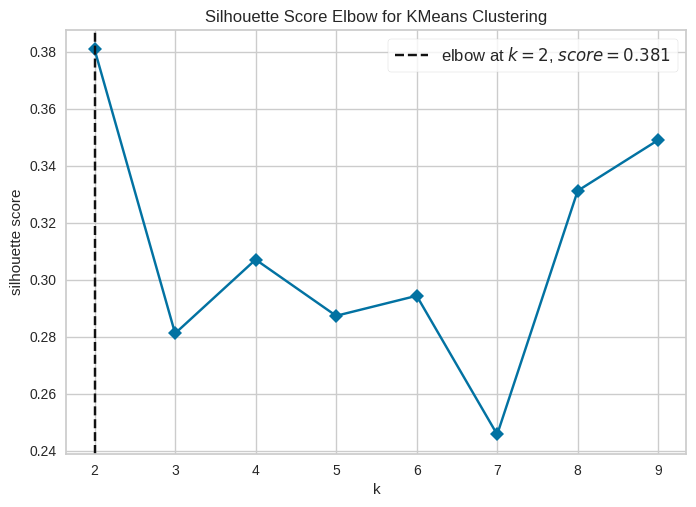

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [140]:
# Insialisasi model K-Means
model = KMeans(random_state=42)

#Menggunakan KElbowVisualizer untuk menemukan jumlah cluster optimal
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(X)
visualizer.show()

In [141]:
# Hitung silhouette score untuk model KMeans
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score untuk {kmeans.n_clusters} cluster: {sil_score:.4f}")

Silhouette Score untuk 2 cluster: 0.3808


**Insight**:
*   Berdasarkan metode Elbow pada model K-Means, jumlah cluster optimalnya adalah 2 dengan nilai silhoutte yang dihasilkan adalah 0.3808
*   List item

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

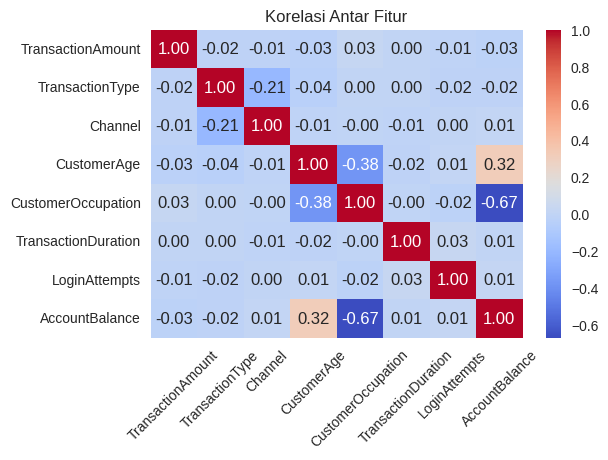

In [142]:
# Cek korelasi antar fitur
plt.figure(figsize=(6,4))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.xticks(rotation=45)
plt.show()

In [143]:
# Menghapus fitur yang memiliki korelasi sangat rendah
X_selected = df[['CustomerOccupation', 'AccountBalance']]  # Memilih fitur yang relevan

# Inisialisasi model KMeans dengan jumlah cluster yang optimal
kmeans_selected = KMeans(n_clusters=4, random_state=42)
kmeans_selected.fit(X_selected)

# Mendapatkan label cluster
labels_selected = kmeans_selected.labels_

# Evaluasi menggunakan Silhouette Score
sil_score_selected = silhouette_score(X_selected, labels_selected)
print(f"Silhouette Score setelah fitur terpilih: {sil_score_selected:.4f}")

Silhouette Score setelah fitur terpilih: 0.8124


**Insight**:
*   Dengan Correlation-based Selection, fitur ini dipilih untuk mengetahui fitur mana yang memiliki korelasi sangat rendah, sehingga dapat dilakukan penghapusan fitur yang memiliki korelasi sangat rendah ataupun tinggi untuk mengurangi redudansi.
*   Dengan melakukan teknik ini, dapat meningkatkan Silhoutte Score terhadap kualitas clustering.
****

***Membuat Perbandingan***
- Silhouette Score Awal (0.3808): Skor ini diperoleh dari KMeans biasa menggunakan semua fitur pada dataset, dengan silhoutte score yang dihasilkan menunjukkan kualitas clustering yang kurang baik dengan pemisahan cluster cukup solid, namun masih ada potensi noise dari fitur yang kurang relevan.
- Silhouette Score setelah Pemilihan Fitur (0.8124): Dengan pemilihan fitur menggunakan Correlation-based Selection dengan melakukan pengecekan fitur yang memiliki korelasi yang rendah.
- Setelah melakukan Silhouttee skor meningkat menjadi 0.8124, menunjukkan bahwa fitur yang dipilih cukup representatif untuk menangkap pola clustering secara optimal, sehingga pemisahan cluster menjadi lebih baik dibandingkan dua metode sebelumnya.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

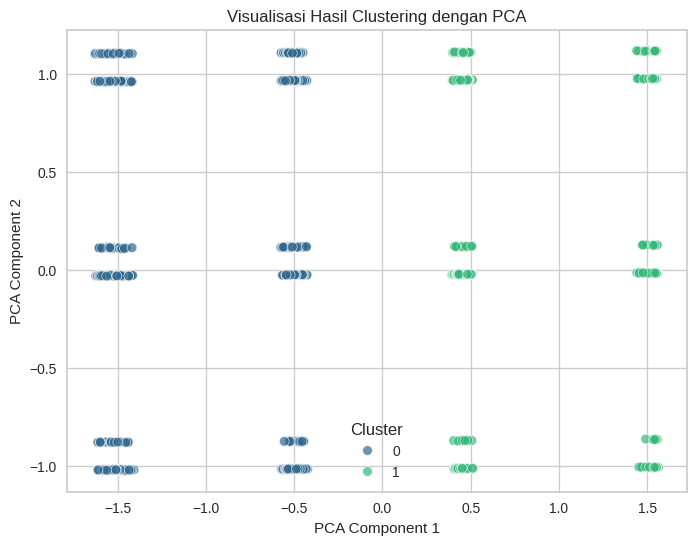

In [144]:
# Reduksi ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Masukkan hasil PCA ke DataFrame
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Scatter plot hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['pca1'], y=df['pca2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

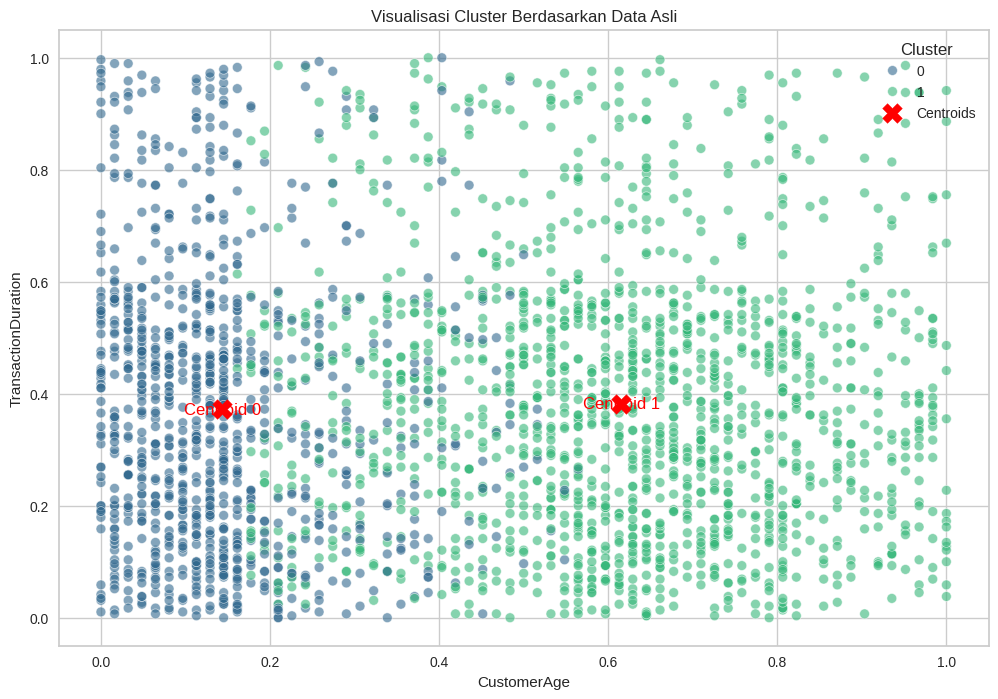

Nilai Centroids (dalam skala asli):
Centroid 0: {'TransactionAmount': np.float64(0.16138599247021346), 'CustomerAge': np.float64(0.1437068993692201), 'TransactionDuration': np.float64(0.37200503091919085), 'LoginAttempts': np.float64(0.028368794326241148), 'AccountBalance': np.float64(0.15451609322209353)}
Centroid 1: {'TransactionAmount': np.float64(0.1507913833294105), 'CustomerAge': np.float64(0.6156636700158646), 'TransactionDuration': np.float64(0.38201243640474847), 'LoginAttempts': np.float64(0.032950819672131176), 'AccountBalance': np.float64(0.4550607564141774)}


In [145]:
features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
X = df[features].values  # Ambil nilai dari dataframe

# K-Means clustering
optimal_k = 2  # Sesuaikan jumlah cluster
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)  # Tambahkan hasil cluster ke dataframe

centroids = kmeans.cluster_centers_  # Ambil centroid hasil clustering

# PILIH FITUR UNTUK PLOT
x_index = 1  # TransactionAmount
y_index = 2  # AccountBalance

plt.figure(figsize=(12, 8))

# Scatter plot untuk data asli
sns.scatterplot(x=X[:, x_index], y=X[:, y_index], hue=df["Cluster"], palette="viridis", s=50, alpha=0.6, edgecolor="w")

# Plot centroid dengan warna merah
plt.scatter(centroids[:, x_index], centroids[:, y_index], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[x_index], centroid[y_index], f'Centroid {i}', color='red', fontsize=12, ha='center', va='center')

# Judul dan label sumbu
plt.title('Visualisasi Cluster Berdasarkan Data Asli')
plt.xlabel(features[x_index])
plt.ylabel(features[y_index])
plt.legend(title="Cluster")
plt.show()

# Menampilkan nilai centroid dalam skala asli
print("Nilai Centroids (dalam skala asli):")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i}: {dict(zip(features, centroid))}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [146]:
# Menambahkan label cluster ke dalam df
df["Cluster"] = kmeans.labels_

# Inverse transform kolom kategorikal
df["TransactionType"] = label_enc_transactiontype.inverse_transform(df["TransactionType"])
df["Channel"] = label_enc_hannel.inverse_transform(df["Channel"])
df["CustomerOccupation"] = label_enc_customeroccupation.inverse_transform(df["CustomerOccupation"])

print(df[['TransactionType', 'Channel', 'CustomerOccupation']].head())

  TransactionType Channel CustomerOccupation
0           Debit     ATM             Doctor
1           Debit     ATM             Doctor
2           Debit  Online            Student
3           Debit  Online            Student
4          Credit  Online            Student


In [147]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster,pca1,pca2
0,0.007207,Debit,ATM,0.838710,Doctor,0.244828,0.0,0.336832,1,-1.520479,-1.020620
1,0.195940,Debit,ATM,0.806452,Doctor,0.451724,0.0,0.918055,1,-1.608638,-1.020672
2,0.065680,Debit,Online,0.016129,Student,0.158621,0.0,0.068637,0,1.543401,0.975138
3,0.096016,Debit,Online,0.129032,Student,0.051724,0.0,0.569198,0,1.453052,0.975796
4,0.006874,Credit,Online,0.129032,Student,0.648276,0.0,0.492591,0,1.462783,1.115493


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [148]:
# Melakukan inverse transform untuk setiap fitur kategorial
df[numeric_cols.columns] = scaler.inverse_transform(df[numeric_cols.columns])

In [149]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster,pca1,pca2
0,14.09,Debit,ATM,70.0,Doctor,81.0,1.0,5112.21,1,-1.520479,-1.020620
1,376.24,Debit,ATM,68.0,Doctor,141.0,1.0,13758.91,1,-1.608638,-1.020672
2,126.29,Debit,Online,19.0,Student,56.0,1.0,1122.35,0,1.543401,0.975138
3,184.50,Debit,Online,26.0,Student,25.0,1.0,8569.06,0,1.453052,0.975796
4,13.45,Credit,Online,26.0,Student,198.0,1.0,7429.40,0,1.462783,1.115493


In [150]:
# Menghapus fitur yang tidak diperlukan
# Hapus kolom PCA
df = df.drop(columns=['pca1', 'pca2'])

print(df.head())

   TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM         70.0             Doctor   
1             376.24           Debit     ATM         68.0             Doctor   
2             126.29           Debit  Online         19.0            Student   
3             184.50           Debit  Online         26.0            Student   
4              13.45          Credit  Online         26.0            Student   

   TransactionDuration  LoginAttempts  AccountBalance  Cluster  
0                 81.0            1.0         5112.21        1  
1                141.0            1.0        13758.91        1  
2                 56.0            1.0         1122.35        0  
3                 25.0            1.0         8569.06        0  
4                198.0            1.0         7429.40        0  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

## **Melakukan Analisis Karakteristik**
Berikut adalah proses untuk menganalisis dan menginterpretasi hasil clustering berdasarkan data yang sudah dikelompokkan
menggunakan KMeans. Dengan menganalisis karakteristik tiap cluster berdasarkan fitur yang tersedia, dengan melihat rata-rata dan modus nilai dari beberapa fitur (seperti TransactionAmount, TransactionType, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts,dan Account Balance) dalam setiap cluster.

In [151]:
# melihat jumlah pengguna per cluster
jumlah_pengguna = df['Cluster'].value_counts().sort_index()
print("\nJumlah Pengguna Per Cluster:")
display(jumlah_pengguna)


Jumlah Pengguna Per Cluster:


,count
Cluster,
0,987
1,1525


<ipython-input-152-9804eddb6910>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jumlah_pengguna.index, y=jumlah_pengguna.values, palette='coolwarm')


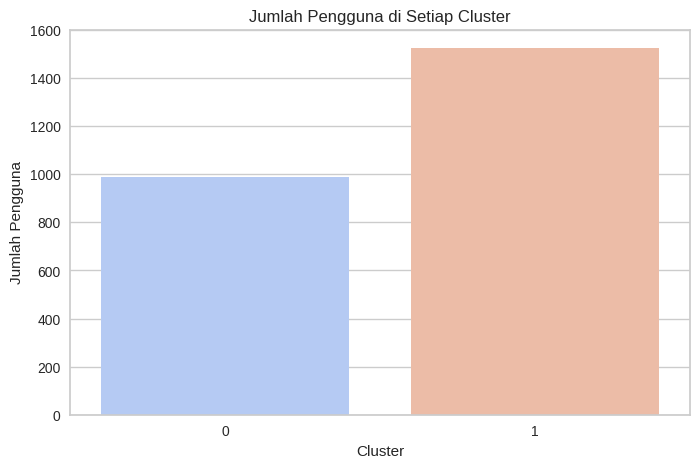

In [152]:
# melihat distribusi jumlah pengguna per cluster menggunakan bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=jumlah_pengguna.index, y=jumlah_pengguna.values, palette='coolwarm')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna di Setiap Cluster')
plt.xticks(rotation=0)
plt.show()

In [153]:
# Analisis statistik deskriptif untuk fitur numerik di setiap cluster
cluster_stats = df.groupby('Cluster')[['CustomerAge','TransactionAmount']].agg(['mean', 'min', 'max', 'median'])

# Analisis distribusi kategori di setiap cluster
category_stats = df.groupby('Cluster')[['TransactionType', 'Channel', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']].agg(lambda x: x.mode()[0])

# Gabungkan hasil statistik deskriptif dan distribusi kategori
cluster_analysis = pd.concat([cluster_stats, category_stats], axis=1)

# Tampilkan hasil analisis
print(cluster_analysis)

         (CustomerAge, mean)  (CustomerAge, min)  (CustomerAge, max)  \
Cluster                                                                
0                  26.909828                18.0                53.0   
1                  56.171148                28.0                80.0   

         (CustomerAge, median)  (TransactionAmount, mean)  \
Cluster                                                     
0                         26.0                 309.935512   
1                         57.0                 289.606046   

         (TransactionAmount, min)  (TransactionAmount, max)  \
Cluster                                                       
0                            0.26                   1762.28   
1                            0.32                   1919.11   

         (TransactionAmount, median) TransactionType Channel  \
Cluster                                                        
0                             219.44           Debit  Branch   
1                    

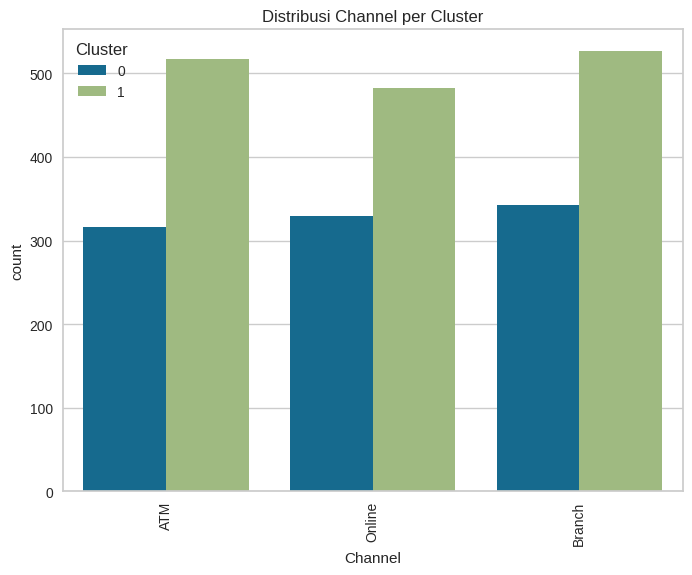

In [154]:
# Barplot untuk distribusi provinsi per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Channel', hue='Cluster', data=df)
plt.title('Distribusi Channel per Cluster')
plt.xticks(rotation=90)
plt.show()

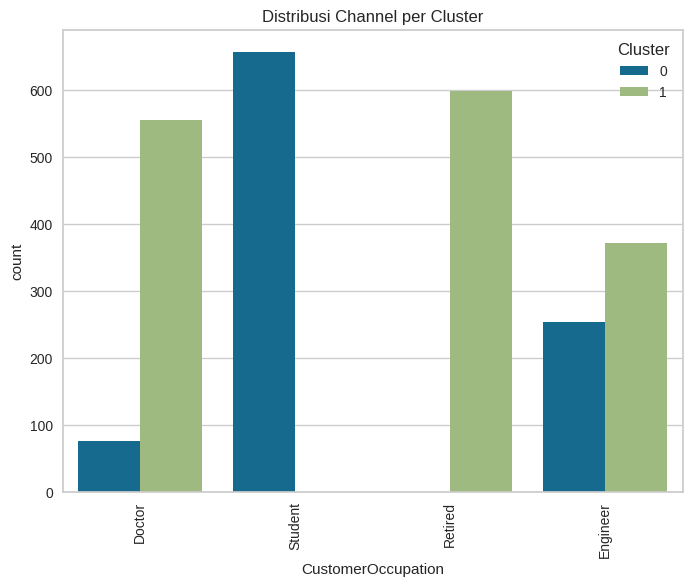

In [155]:
# Barplot untuk distribusi provinsi per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='CustomerOccupation', hue='Cluster', data=df)
plt.title('Distribusi Channel per Cluster')
plt.xticks(rotation=90)
plt.show()

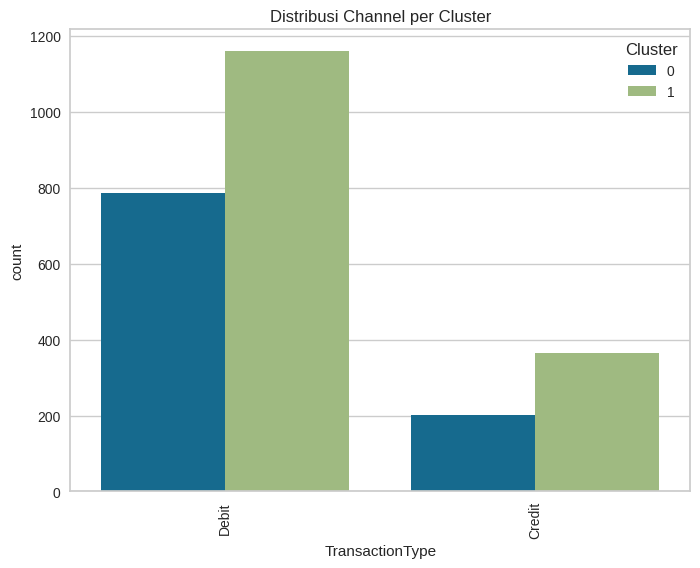

In [156]:
# Barplot untuk distribusi provinsi per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='TransactionType', hue='Cluster', data=df)
plt.title('Distribusi Channel per Cluster')
plt.xticks(rotation=90)
plt.show()

In [157]:
X_inverse = df[numeric_cols.columns].values
labels = df["Cluster"].values

# Buat dictionary indeks kolom berdasarkan urutan dalam X_inverse
col_indices = {col: i for i, col in enumerate(numeric_cols.columns)}

categorical_columns = ["TransactionType", "CustomerOccupation", "Channel"]

def analyze_clusters(X_inverse, labels, df, k=optimal_k):
    print("\nAnalisis Karakteristik Setiap Cluster \n")

    for cluster_id in range(k):
        # Ambil data berdasarkan cluster
        cluster_data = X_inverse[np.where(labels == cluster_id)]
        cluster_df = df[df["Cluster"] == cluster_id]  # Ambil subset dataframe untuk cluster ini

        if cluster_data.shape[0] == 0:
            print(f"⚠️ Cluster {cluster_id + 1} kosong!\n")
            continue

        # Hitung statistik untuk fitur numerik
        mean_transaction = np.mean(cluster_data[:, col_indices["TransactionAmount"]])
        min_transaction = np.min(cluster_data[:, col_indices["TransactionAmount"]])
        max_transaction = np.max(cluster_data[:, col_indices["TransactionAmount"]])

        mean_age = np.mean(cluster_data[:, col_indices["CustomerAge"]])
        min_age = np.min(cluster_data[:, col_indices["CustomerAge"]])
        max_age = np.max(cluster_data[:, col_indices["CustomerAge"]])

        mean_login_attempts = np.mean(cluster_data[:, col_indices["LoginAttempts"]])
        mean_balance = np.mean(cluster_data[:, col_indices["AccountBalance"]])
        mean_duration = np.mean(cluster_data[:, col_indices["TransactionDuration"]])

        # Hitung modus untuk fitur kategorikal
        mode_values = {}
        for cat_col in categorical_columns:
            if cat_col in cluster_df.columns:
                # Use pandas' value_counts to find the mode for categorical data
                mode_value = cluster_df[cat_col].value_counts().idxmax()
                mode_values[cat_col] = mode_value

        # Cetak hasil analisis dalam format yang sesuai
        print(f"CLUSTER {cluster_id}:")
        print(f"   - Rata-Rata Jumlah Transaksi {mean_transaction:.2f}, dengan batas minimum {min_transaction:.2f} dan maksimum {max_transaction:.2f}.")
        print(f"   - Rata-Rata Usia Pelanggan {mean_age:.2f}, dengan rentang usia {min_age} hingga {max_age}.")
        print(f"   - Rata-Rata Percobaan Login {mean_login_attempts:.2f}")
        print(f"   - Rata-Rata Saldo Akun {mean_balance:.2f}")
        print(f"   - Rata-Rata Durasi Transaksi {mean_duration:.2f}")
        for cat_col, mode_val in mode_values.items():
            print(f"   - {cat_col} memiliki modus kategori '{mode_val}'")

# Panggil fungsi analisis dengan semua parameter
analyze_clusters(X_inverse, labels, df, k=optimal_k)


Analisis Karakteristik Setiap Cluster 

CLUSTER 0:
   - Rata-Rata Jumlah Transaksi 309.94, dengan batas minimum 0.26 dan maksimum 1762.28.
   - Rata-Rata Usia Pelanggan 26.91, dengan rentang usia 18.0 hingga 53.0.
   - Rata-Rata Percobaan Login 1.11
   - Rata-Rata Saldo Akun 2399.95
   - Rata-Rata Durasi Transaksi 117.88
   - TransactionType memiliki modus kategori 'Debit'
   - CustomerOccupation memiliki modus kategori 'Student'
   - Channel memiliki modus kategori 'Branch'
CLUSTER 1:
   - Rata-Rata Jumlah Transaksi 289.61, dengan batas minimum 0.32 dan maksimum 1919.11.
   - Rata-Rata Usia Pelanggan 56.17, dengan rentang usia 28.0 hingga 80.0.
   - Rata-Rata Percobaan Login 1.13
   - Rata-Rata Saldo Akun 6871.07
   - Rata-Rata Durasi Transaksi 120.78
   - TransactionType memiliki modus kategori 'Debit'
   - CustomerOccupation memiliki modus kategori 'Retired'
   - Channel memiliki modus kategori 'Branch'


**Analisis Karakteristisk Cluster dari Model KMeans**
Berikut adalah Karakteristik untuk setiap cluster yang dihasilkan dari model KMeans

*   **Cluster 0**:
  *   **Rata-rata Jumlah Transaksi** : 309.94 (Min: 0.26 dan Max: 1762)
  *   **Rata-rata Usia Pelanggan** : 26 (Rentang : 18-53 tahun)
  *   **Rata-rata Percobaan Login** : 1 kali
  *   **Rata-rata Saldo Akun** : 2399.95
  *   **Rata-rata Durasi Transaksi** : 117.88 detik
  *   **Channel terbanyak yang digunakan pelanggan** : Branch (Cabang Bank)
  *   **Tipe Transaksi terbanyak yang digunakan pelanggan** : Debit
  *   **Profesi Terbanyak** : Student (Mahasiswa)

*   **Analisis** : Cluster ini didominasi oleh pelanggan mahasiswa dengan profesi sebagai **mahasiswa**. Pelanggan dalam cluster ini memiliki saldo akun yang relatif rendah dan lebih memilih bertransaki secara langsung dengan datang di cabang bank (**Branch**). Durasi transaksi yang dilakukan cukup lama bisa mengindikasi bahwa pelanggan sering berkonsultasi atau membutuhkan bantuan dalam bertransaksi. Pada cluster ini memiliki tingkat risiko fraud yang **rendah**, kecuali jika ditemukan anomali seperti peningkatan mendadak dalam jumlah transaksi.

*   **Cluster 1**:
  *   **Rata-rata Jumlah Transaksi** : 289.61 (Min: 0.32 dan Max: 1919.11)
  *   **Rata-rata Usia Pelanggan** : 56 (Rentang : 28-80 tahun)
  *   **Rata-rata Percobaan Login** : 1 kali
  *   **Rata-rata Saldo Akun** : 6871.07
  *   **Rata-rata Durasi Transaksi** : 120.78 detik
  *   **Channel terbanyak dipakai pelanggan** : Branch
  *   **Tipe Transaksi terbanyak dipakai pelanggan** : Debit
  *   **Profesi Terbanyak** : Retired (Pensiunan)

*   **Analisis** : Cluster ini didominasi oleh pelanggan yang lebih tua dengan mayoritas pelanggan adalah **pensiunan**. Pelanggan dalam cluster ini memiliki saldo akun yang lebih tinggi dari cluster lainnya. Dengan sebagian besar transaksi terjadi di cabang bank (**Branch**). Durasi transaksi yang dilakukan lebih sedikit lama dibandingkan dengan cluster lainnya, sehingga dapat menimbulkan indikasi bahwa pelanggan sering berkonsultasi atau membutuhkan bantuan dalam bertransaksi. Pada cluster ini memiliki tingkat risiko fraud yang **rendah**, kecuali jika ditemukan anomali seperti peningkatan mendadak dalam jumlah transaksi. Meskipun risiko fraud rendah pelanggan dalam cluster ini lebih rentan terhadap serangan social engineering seperti phising atau penipuan berbasis telepon.

****

**Pola yang dapat Dimanfaatkan:**
1. **Account Balance untuk Saldo Rendah vs Saldo Tinggi**
*   Cluster dengan saldo rendah, lebih sering melakukan transaksi kecil tetapi sering, yang bisa dieksploitasi dalam bentuk fraud dengan skema skimming atau transaksi tidak sah yang sulit dideteksi.
*   Cluster dengan saldo tinggi, memiliki risiko lebih besar jika terkena fraud karena potensi kehilangan dana lebih tinggi, sehingga perlu pengamanan ekstra seperti notifikasi real-time dan verifikasi identitas lebih ketat.

2. **Customer Age untuk Usia Muda vs Usia Lebih Tua**
*   Cluster dengan usia muda, lebih rentan terhadap fraud digital seperti phishing, hacking akun, atau scam berbasis aplikasi.
*   Cluster dengan Usia Lebih Tua, lebih rentan terhadap fraud berbasis manipulasi seperti penipuan telepon, skema investasi palsu, atau pencurian identitas di cabang bank.

****

**Kesimpulan**

Hasil clustering memberikan insight yang sangat berguna untuk mencegah resiko fraud. Bank perlu menerapkan edukasi keamanan digital, meningkatkan proteksi identitas dan scam, melakukan monitoring dan notifikasi secara real-time untuk mengaktifkan sistem peringatan otomatis jika ada transaksi besar yang tidak biasa atau perubahan mendadak pada informasi akun. Dengan langkah-langkah ini, resiko fraud dapat diminimalkan secara efektif.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [158]:
# Menyimpan hasil clustering ke dalam file CSV
df.to_csv('data_clustering.csv', index=False)